In [1]:
from histogram_distribution.histogram_distribution import HistogramDistribution
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import tqdm.notebook as tqdm
np.random.seed(1)

In [2]:
n_distributions = 5
event_size = 3
n_samples = 500
bins = np.array([31, 32, 33])
prior_ranges = np.array([[-20, 20], [-20, 20], [-20, 20]])

In [3]:
original_dist = tfp.distributions.MultivariateNormalDiag(
    loc= np.random.uniform(-10., 10., (n_distributions, event_size)), 
    scale_diag=np.random.uniform(0., 10., (n_distributions, event_size)))

In [4]:
chain = original_dist.sample(n_samples).numpy()

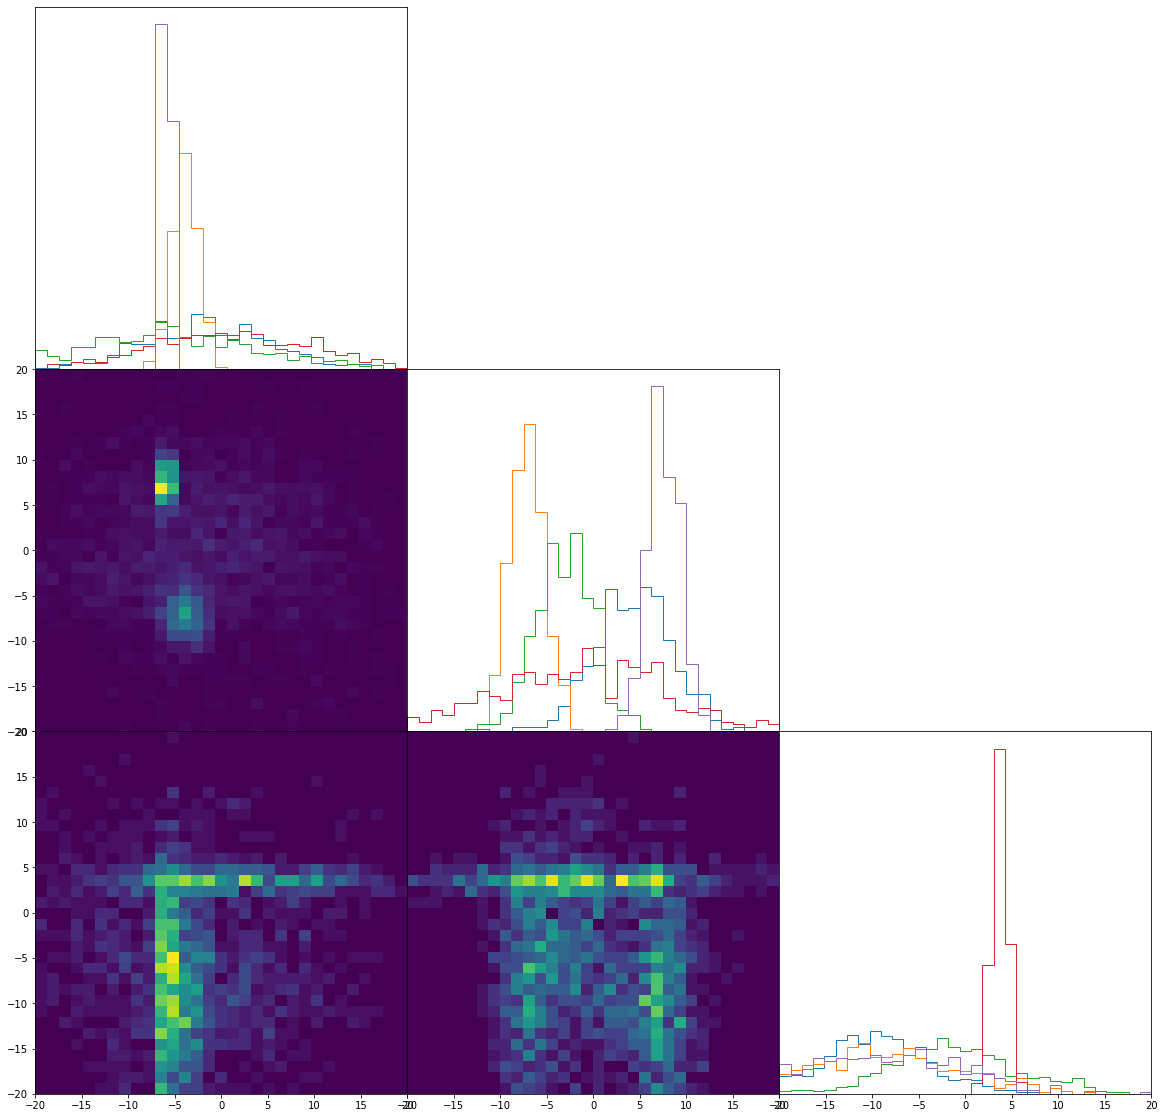

In [5]:
fig, ax = plt.subplots(event_size, event_size, figsize=(20, 20))
plt.subplots_adjust(wspace=0, hspace=0)
for row in tqdm.tnrange(event_size):
    for column in range(event_size):
        if column > 0:
            ax[row, column].set_yticks([])
        if row < event_size-1:
            ax[row, column].set_xticks([])
        if column == 0 and row == 0:
            ax[row, column].set_yticks([])
        if column < row:
            ax[row, column].set_xlim(prior_ranges[column])
            ax[row, column].set_ylim(prior_ranges[row])
            ax[row, column].hist2d(
                chain[:, :, column].reshape((-1)), 
                chain[:, :, row].reshape((-1)), 
                bins=bins[(column, row),], 
                range=prior_ranges[(column, row), :],
                density=True)
        elif column == row:
            ax[row, column].set_xlim(prior_ranges[column])
            for dist in range(n_distributions):
                ax[row, column].hist(
                    chain[:, dist, column], 
                    bins=bins[column], 
                    range=prior_ranges[column], 
                    density=True, 
                    histtype="step")
        else:
            ax[row, column].axis("off")

In [19]:
hd = HistogramDistribution(samples=chain, prior_ranges=prior_ranges, bins=bins)

In [20]:
hd.prob(original_dist.sample()[0]).shape, hd.prob(original_dist.sample()).shape

((5,), (5, 5))

In [21]:
samples = hd.sample(int(1e5))
samples.shape

(100000, 5, 3)

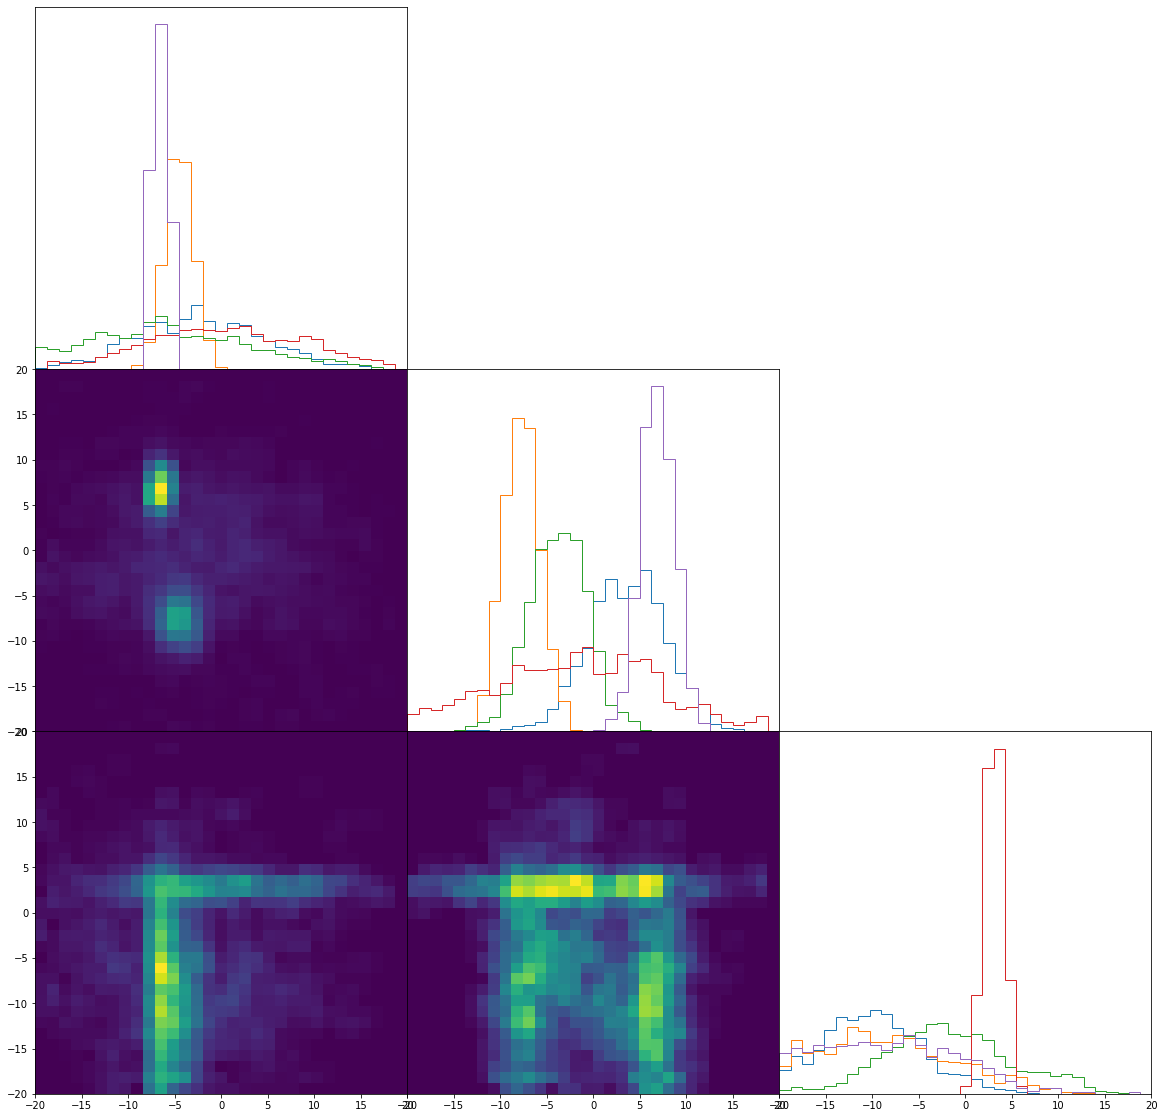

In [22]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
plt.subplots_adjust(wspace=0, hspace=0)
for row in tqdm.tnrange(3):
    for column in range(3):
        if column > 0:
            ax[row, column].set_yticks([])
        if row < 2:
            ax[row, column].set_xticks([])
        if column == 0 and row == 0:
            ax[row, column].set_yticks([])
        if column < row:
            ax[row, column].set_xlim(prior_ranges[column])
            ax[row, column].set_ylim(prior_ranges[row])
            ax[row, column].hist2d(
                samples[:, :, column].reshape((-1)), 
                samples[:, :, row].reshape((-1)), 
                bins=bins[(column, row),], 
                range=prior_ranges[(column, row), :],
                density=True)
        elif column == row:
            ax[row, column].set_xlim(prior_ranges[column])
            for dist in range(5):
                ax[row, column].hist(
                    samples[:, dist, column], 
                    bins=bins[column], 
                    range=prior_ranges[column], 
                    density=True, 
                    histtype="step")
        else:
            ax[row, column].axis("off")